![Tinder](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Tinder-Symbole.png)

# Speed Dating with Tinder

## Company's description 📇

<a href="https://tinder.com/" target="_blank">Tinder</a> is an online dating and geosocial networking application. In Tinder, users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photos, a short bio, and a list of their interests.

Tinder was launched by Sean Rad at a hackathon held at the Hatch Labs incubator in West Hollywood in 2012.

As of 2021, Tinder has recorded more than 65 billion matches worldwide.

## Project 🚧

The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand **what makes people interested into each other**.

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates whether each of them secretly agreed to go on a second date with the other person.

## Goals 🎯

Use the dataset to understand what makes people interested into each other to go on a second date together:
* You may use descriptive statistics
* You may use visualisations

## Scope of this project 🖼️

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

[Dataset](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv)

[Dataset Description](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you

Data Exploration Ideas :
* What are the least desirable attributes in a male partner? Does this differ for female partners?
* How important do people think attractiveness is in potential mate selection vs. its real impact?
* Are shared interests more important than a shared racial background?
* Can people accurately predict their own perceived value in the dating market?
* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

## Deliverable 📬

To complete this project, your team should deliver:

A notebook with:
* descriptive statistics
* visualisations
* captions and interpretations on how the stats and visualisations are relevant to why people agree to a second date

In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [147]:
# import chardet
# with open("/content/drive/MyDrive/Speed+Dating+Data.csv", 'rb') as file:
#     print(chardet.detect(file.read()))

In [148]:
df = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [149]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

# 1. Understanding the dataset

In [150]:
# First look at the dataset
print(f"Number of rows: {df.shape[0]}\n")
print(f"Number of columns: {df.shape[1]}\n")

print("Basics statistics: ")
df_desc = df.describe(include ='all')
display(df_desc)

Number of rows: 8378

Number of columns: 195

Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [151]:
print("Percentage of missing values:")
display((df.isnull().sum() * 100 / len(df)).round(decimals=2))

Percentage of missing values:


iid          0.00
id           0.01
gender       0.00
idg          0.00
condtn       0.00
wave         0.00
round        0.00
position     0.00
positin1    22.03
order        0.00
partner      0.00
pid          0.12
match        0.00
int_corr     1.89
samerace     0.00
age_o        1.24
race_o       0.87
pf_o_att     1.06
pf_o_sin     1.06
pf_o_int     1.06
pf_o_fun     1.17
pf_o_amb     1.28
pf_o_sha     1.54
dec_o        0.00
attr_o       2.53
sinc_o       3.43
intel_o      3.65
fun_o        4.30
amb_o        8.62
shar_o      12.84
like_o       2.98
prob_o       3.80
met_o        4.60
age          1.13
field        0.75
field_cd     0.98
undergra    41.35
mn_sat      62.60
tuition     57.23
race         0.75
imprace      0.94
imprelig     0.94
from         0.94
zipcode     12.70
income      48.93
goal         0.94
date         1.16
go_out       0.94
career       1.06
career_c     1.65
sports       0.94
tvsports     0.94
exercise     0.94
dining       0.94
museums      0.94
art       

Each row represents a date, which means that each participant is featured several times throughout the waves of blind dates.
In order to analyse our participants, we must look at the unique entries only.
In the dataset, the unique id for each participant is in the "iid" column.

There are 195 variables, which were gathered by administering questionnaires throughout the process.

---



1) Each participant filled out a form prior to the experiment, registering :

*   demographics

*   dating habits
*   self-perception across key attributes

*   beliefs on what others find valuable in a mate

*   lifestyle information

---



2) Attendees had a 4 minute speed date with each member of the opposite sex in the wave, and were asked if they would like to see their date again. They were also asked to rate their date on six attributes:


*   Attractiveness

*   Sincerity

*   Intelligence
*   Fun


*   Ambition


*   Shared Interests

---

3) The questions were asked in 3 steps
1. Before the date
2. After the date
3. 3-4 weeks after the date

---

The missing value counts show us that there are variables with a high percentage of missing values. We can assume that participants did not fully complete the forms, probably due to the extensive nature of the questionnaires. We'll try imputing values for columns with only a few missing inputs, and we'll drop columns that have too many missing values to be used in our analysis.


---

Another element to note is that waves 6 to 9 were asked to rank their dates' attributes out of 10 independent of one another, while the other groups were given a total of 100 points to be distributed among the five attributes. We'll have to normalize the data and convert the scores out of 10 to be out of 100.

In [152]:
# Imputing missing values :
# We can input the missing id and pid rather easily.
df[df["id"].isna()]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8377,552,NaN,1,44,2,21,22,2,10.0,15,22,530.0,0,0.01,0,22.0,4.0,20.0,20.0,10.0,15.0,5.0,30.0,1,8.0,8.0,7.0,7.0,7.0,7.0,8.0,5.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,3.0,7.0,6.0,4.0,8.0,1.0,4.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [153]:
df[df["iid"] == 552]["id"]

8356    22.0
8357    22.0
8358    22.0
8359    22.0
8360    22.0
8361    22.0
8362    22.0
8363    22.0
8364    22.0
8365    22.0
8366    22.0
8367    22.0
8368    22.0
8369    22.0
8370    22.0
8371    22.0
8372    22.0
8373    22.0
8374    22.0
8375    22.0
8376    22.0
8377     NaN
Name: id, dtype: float64

In [154]:
df.iloc[8377, 1] = 22.0
df[df["iid"] == 552]["id"]

8356    22.0
8357    22.0
8358    22.0
8359    22.0
8360    22.0
8361    22.0
8362    22.0
8363    22.0
8364    22.0
8365    22.0
8366    22.0
8367    22.0
8368    22.0
8369    22.0
8370    22.0
8371    22.0
8372    22.0
8373    22.0
8374    22.0
8375    22.0
8376    22.0
8377    22.0
Name: id, dtype: float64

In [155]:
df[df["pid"].isna()]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1755,122,1.0,1,2,1,5,10,4,NaN,6,7,NaN,0,-0.12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Law,1.0,NaN,NaN,NaN,6.0,1.0,1.0,Long Island,"11,793","57,887.00",1.0,3.0,1.0,Lawyer,1.0,7.0,9.0,7.0,9.0,7.0,6.0,5.0,6.0,6.0,6.0,8.0,7.0,8.0,8.0,8.0,5.0,4.0,6.0,10.0,40.0,15.0,10.0,20.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,7.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,0,6.0,10.0,8.0,8.0,8.0,8.0,8.0,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
1765,123,2.0,1,4,1,5,10,4,NaN,10,7,NaN,0,-0.29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Biomedical Engineering,5.0,NaN,NaN,NaN,4.0,3.0,5.0,Louisiana,"70,605","30,768.00",2.0,5.0,1.0,Cardiologist,4.0,9.0,9.0,8.0,8.0,3.0,2.0,5.0,5.0,6.0,2.0,7.0,2.0,7.0,7.0,7.0,7.0,5.0,5.0,1.0,50.0,10.0,20.0,5.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,50.0,10.0,5.0,5.0,10.0,8.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,4.0,5.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1775,124,3.0,1,6,1,5,10,4,NaN,3,7,NaN,0,-0.05,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Economics and Political Science,8.0,NaN,NaN,NaN,4.0,1.0,1.0,Maryland,"20,815","66,699.00",2.0,4.0,1.0,Law or finance,1.0,5.0,5.0,8.0,10.0,8.0,8.0,6.0,5.0,8.0,8.0,6.0,9.0,9.0,9.0,8.0,8.0,7.0,6.0,10.0,40.0,10.0,10.0,10.0,10.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,30.0,10.0,10.0,20.0,10.0,8.0,8.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,1,6.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,10.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,125,4.0,1,8,1,5,10,4,NaN,8,7,NaN,0,0.15,0,NaN,NaN,NaN,NaN,NaN,

In [156]:
df[(df["wave"]==5)&(df["gender"]==0)&(df["id"]==7)]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3


In [157]:
# Wave 5 had 10 males and 10 females, the missing pid is the 7th female of wave 5, it seems they are the missing 118 iid. The person probably did not show up to the experiment or asked to be left out of it.
# There are also many missing values in the corresponding rows so it's safe to assume we won't be using this data.

In [158]:
# Since it's impossible to impute data regarding personal preferences, we'll drop these columns that have more than 50% missing values.
threshold = 50.00
to_drop = (df.isnull().sum() * 100 / len(df)).round(decimals=2).loc[lambda x : x >= threshold]
columns_to_drop = list(to_drop.index)
columns_to_drop.remove("expnum") # We're keeping expnum as we're using it later in our analysis
print(f"Dropped columns with more than 50% missing values : {columns_to_drop}")

Dropped columns with more than 50% missing values : ['mn_sat', 'tuition', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']


In [159]:
df = df.drop(columns = columns_to_drop)

In [160]:
# Normalizing waves 6-9
df[df["wave"].isin([6, 7, 8, 9])].describe(include = "all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
count,1562.000000,1562.000000,1562.00000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1552.000000,1562.000000,1557.000000,1557.000000,1557.000000,1557.00000,1557.000000,1557.000000,1557.000000,1557.000000,1562.000000,1554.000000,1538.000000,1532.000000,1507.000000,1434.000000,1340.000000,1534.000000,1523.000000,1520.000000,1557.000000,1557,1557.000000,0,1557.000000,1557.000000,1557.000000,1557,1327,936,1557.000000,1557.000000,1557.000000,1557,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,0.0,1557.000000,1557.00000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,0.0,0.0,0.0,0.0,0.0,1562.000000,1554.000000,1538.000000,1532.000000,1507.000000,1434.000000,1340.000000,1534.000000,1523.000000,1520.000000,927.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN,0,NaN,NaN,NaN,79,80,57,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International Affairs,NaN,NaN,NaN,NaN,NaN,New York,0,"55,080.00",NaN,NaN,NaN,professor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN,NaN,NaN,NaN,NaN,167,56,36,NaN,NaN,NaN,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

It appears scores have already been normalized, with the exclusion of all 4_1 and 4_2. They represent what each participant think fellow men/women are looking for in the opposite sex, asked respectively before the day and right after the date.

We can therefore use all scores for all waves, except these 2, which will need to be normalized if we end up using them in our analysis.

# 2. Participants' profiles analysis

What are the general characteristics of the participants, and what matters to them in a speed dating experience?

## 2.1. Gender

In [161]:
df_part = df.copy(deep = True).drop_duplicates(subset = ["iid"], keep = "first", ignore_index = True)
df_part.shape

(551, 137)

In [162]:
df_part.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
1,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,5.0,2.0,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
2,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0,2.0,4.0,3.0,2.0,24.14,13.79,20.69,27.59,10.34,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
4,5,5.0,0,9,1,1,10,4,NaN,1,1,11.0,0,-0.43,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.0,6.0,5.0,2.0,21.0,Law,1.0,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,0,5.0,8.0,8.0,2.0,2.0,2.0,7.0,5.0,2.0,NaN,7.0,2.0,2.0,15.79,13.16,18.42,15.79,15.79,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN


In [163]:
df_part.describe(include = "all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,421.000000,551.000000,551.0,551.000000,551.000000,544.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,543.000000,529.000000,538.000000,536.000000,513.000000,514.000000,540.000000,538.000000,530.000000,543.000000,545,544.000000,315,545.000000,544.000000,544.000000,544,475,281,544.000000,543.000000,544.000000,543,539.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,543.000000,126.000000,544.000000,544.000000,544.000000,543.000000,542.000000,541.000000,417.000000,417.000000,417.000000,417.000000,417.000000,416.000000,544.000000,544.000000,544.000000,544.000000,543.000000,543.000000,542.000000,542.000000,542.000000,542.000000,542.000000,314.000000,314.000000,314.000000,314.000000,314.000000,551.000000,542.000000,537.000000,537.000000,530.000000,511.000000,482.000000,539.000000,536.000000,534.000000,479.000000,485.000000,485.000000,482.000000,484.000000,485.000000,485.000000,485.000000,485.000000,485.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,485.000000,485.000000,485.000000,485.000000,485.000000,277.000000,277.000000,277.000000,277.000000,277.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaN,Harvard,NaN,NaN,NaN,New York,0,"55,080.00",NaN,NaN,NaN,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,6,NaN,NaN,NaN,36,23,8,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [164]:
df_part["gender"] = df_part["gender"].map({1 : "Male", 0 : "Female"})

The experiment was dedicated to partners of opposite genders. Specifically, we have : 

551 different participants 

277 are male (50.27%) 

274 are female (49.73%) 



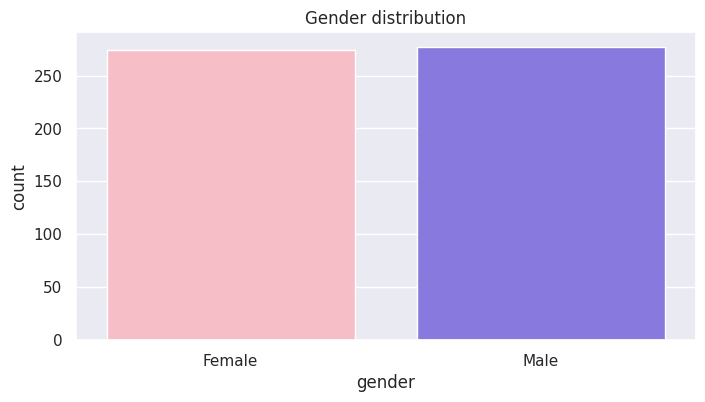

In [165]:
print("The experiment was dedicated to partners of opposite genders. Specifically, we have : \n")

total = len(df['iid'].unique())
males = df_part["gender"].value_counts()["Male"]
females = df_part["gender"].value_counts()["Female"]
print(f"{total} different participants \n")
print(f"{males} are male ({round(males*100/total, 2)}%) \n")
print(f"{females} are female ({round(females*100/total, 2)}%) \n")

plt.figure(figsize = (8,4))
sns.set(style = "darkgrid")
palette = {"Male" : "mediumslateblue",
           "Female" : "lightpink"}
sns.countplot(x = "gender", data = df_part, palette = palette)
plt.title("Gender distribution")
plt.show()

What is the age distribution of our attendees? Are there differences between genders? 



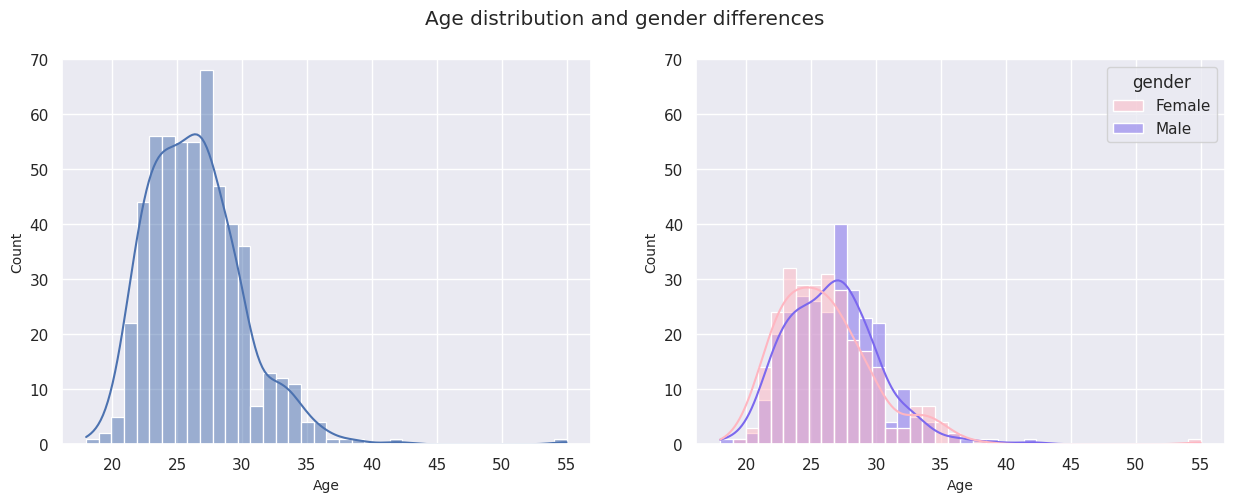

In [166]:
print("What is the age distribution of our attendees? Are there differences between genders? \n")

fig_age, axes = plt.subplots(1, 2, figsize = (15, 5))
fig_age.suptitle("Age distribution and gender differences")

sns.histplot(ax = axes[0], x = df_part["age"], kde = True)
axes[0].set_xlabel('Age', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].set_ylim(0, 70)

sns.histplot(ax = axes[1], data = df_part, x = df_part["age"], hue = "gender", palette = palette, kde = True)
axes[1].set_xlabel('Age', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].set_ylim(0, 70)

plt.show()

In [167]:
df_part[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

Participants' age distribution is approximately normal, with most being between 20 and 30 years old.
Females overall tend to be slightly younger than males.

## 2.2. Race and religion

In [168]:
race_dict = {
    1.0: "Afro-American",
    2.0: "Caucasian",
    3.0: "Hispanic",
    4.0: "Asian",
    5.0: "Native American",
    6.0: "Other"
}

df_part["race"] = df_part["race"].map(race_dict)

What is the race distribution accross our dataset? 



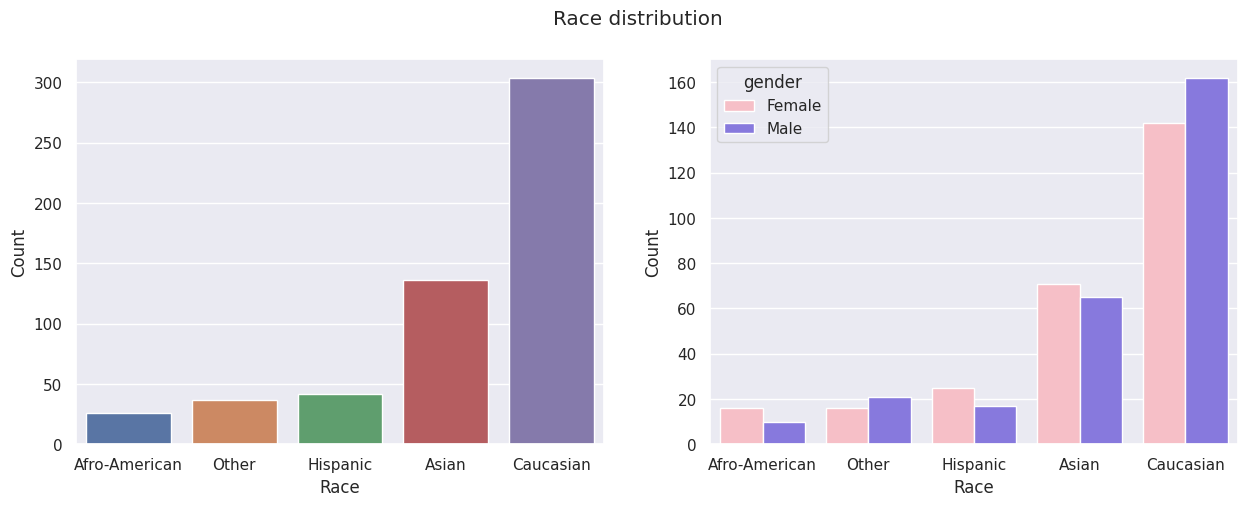

In [169]:
print("What is the race distribution accross our dataset? \n")

fig_race, axes = plt.subplots(1, 2, figsize = (15, 5))
fig_race.suptitle("Race distribution")
sns.countplot(ax = axes[0], x = "race", data = df_part, order = df_part["race"].value_counts(ascending=True).index).set(xlabel = "Race", ylabel = "Count")
sns.countplot(ax = axes[1], x = "race", data = df_part, order = df_part["race"].value_counts(ascending=True).index, hue = "gender", palette = palette).set(xlabel = "Race", ylabel = "Count")
plt.show()

Caucasians are by far the most represented race, with Asians coming second with less than half the numbers. Race distribution is relatively similar across both genders.

How important is it for participants that their date be of the same race? 



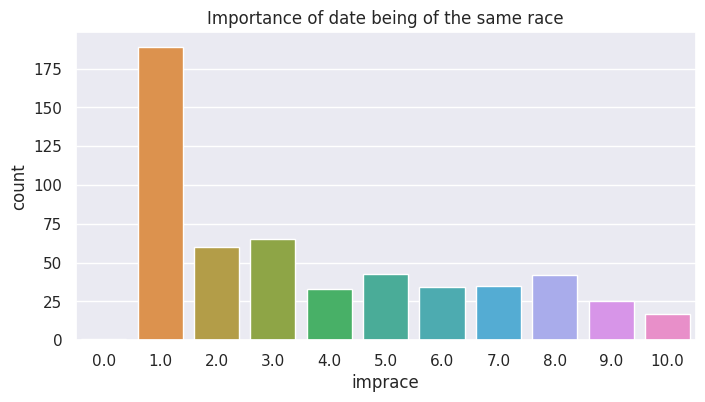

In [170]:
print("How important is it for participants that their date be of the same race? \n")

plt.figure(figsize = (8,4))
sns.countplot(x = "imprace", data = df_part)
plt.title("Importance of date being of the same race")
plt.show()

Participants declare that race is not a determining factor in who they chose to date.

How important is it for participants that their date be of the same religion? 



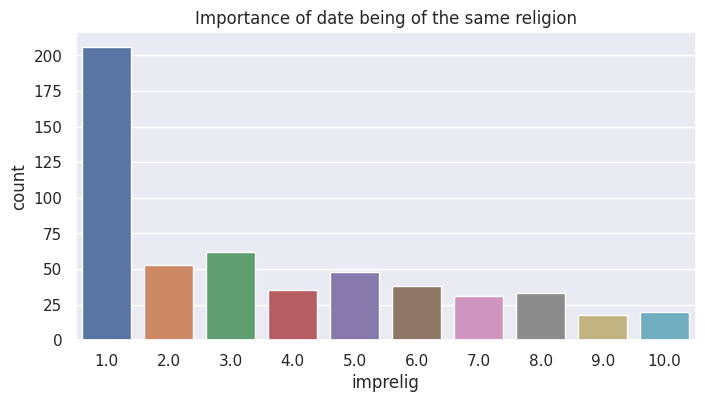

In [171]:
print("How important is it for participants that their date be of the same religion? \n")

plt.figure(figsize = (8,4))
sns.countplot(x = "imprelig", data = df_part)
plt.title("Importance of date being of the same religion")
plt.show()

## 2.3. Study field

In [172]:
field_dict = {
    1: "Law",
    2: "Math",
    3: "Social Science, Psychologist",
    4: "Medical Science, Pharmaceuticals, and Bio Tech",
    5: "Engineering",
    6: "English/Creative Writing/ Journalism",
    7: "History/Religion/Philosophy",
    8: "Business/Econ/Finance",
    9: "Education, Academia",
    10: "Biological Sciences/Chemistry/Physics",
    11: "Social Work",
    12: "Undergrad/undecided",
    13: "Political Science/International Affairs",
    14: "Film",
    15: "Fine Arts/Arts Administration",
    16: "Languages",
    17: "Architecture",
    18: "Other"
}

df_part["study_field"] = df_part["field_cd"].map(field_dict)

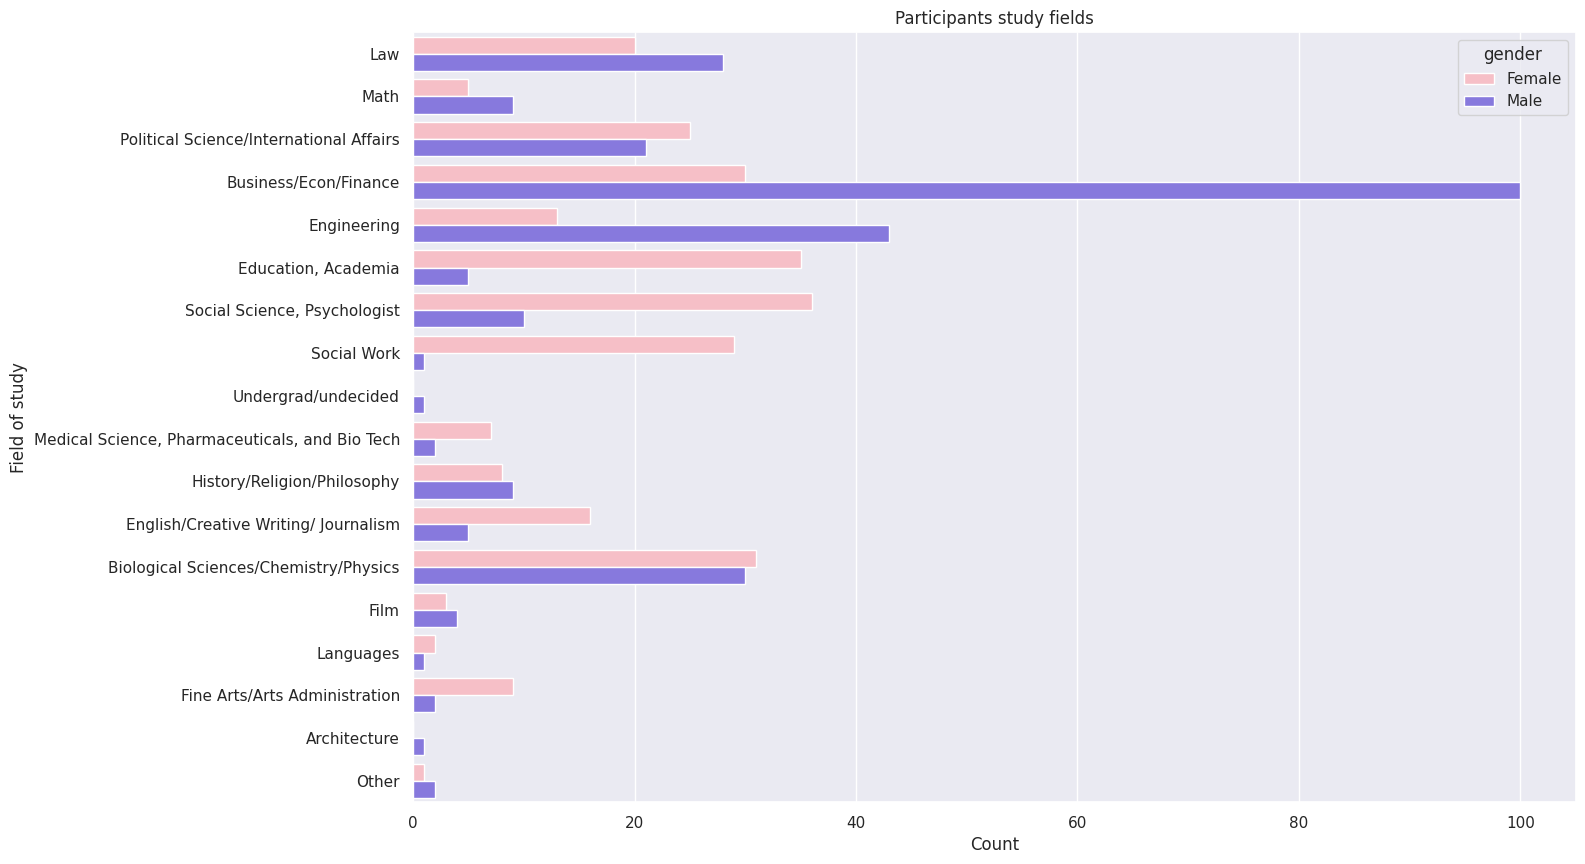

In [173]:
plt.figure(figsize = (15, 10))
sns.countplot(y = "study_field", data = df_part, hue = "gender", palette = palette).set(title = "Participants study fields", xlabel = "Count", ylabel = "Field of study")

plt.show()

We notice some considerable disparities between genders this time : while a vast majority of males study business/finance or engineering, females tend to prefer fields such as social sciences/psychology and education.


## 2.4. Dating habits

In [174]:
dating_dict = {
    1 : "Several times a week",
    2 : "Twice a week",
    3 : "Once a week",
    4 : "Twice a month",
    5 : "Once a month",
    6 : "Several times a year",
    7 : "Almost never"
}

df_part["date"] = df_part["date"].map(dating_dict)

How often do participants go on dates? 



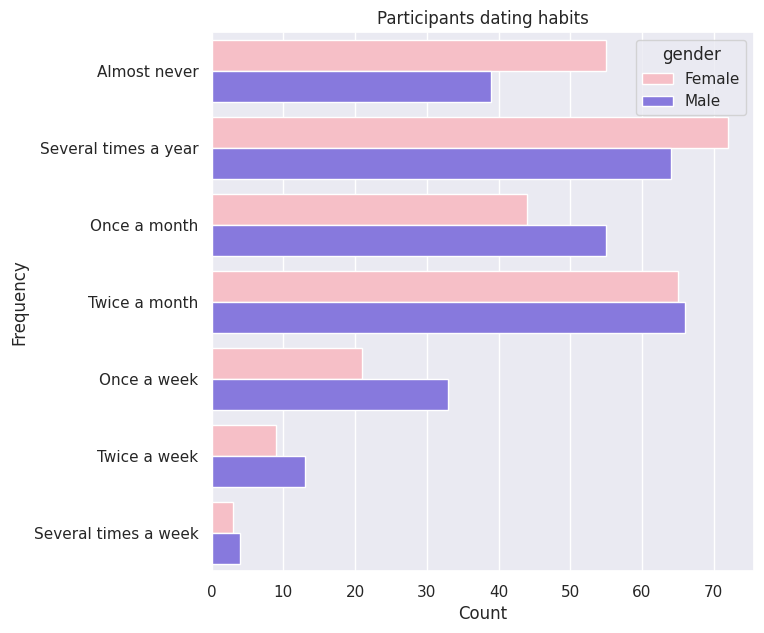

In [175]:
print("How often do participants go on dates? \n")

plt.figure(figsize = (7,7))
sns.countplot(y = "date",
              data = df_part,
              hue = "gender",
              order = ["Almost never", "Several times a year", "Once a month", "Twice a month", "Once a week", "Twice a week", "Several times a week"],
              palette = palette).set(title = "Participants dating habits", xlabel = "Count", ylabel = "Frequency")

plt.show()

It seems more women never go on a date than men, and overall men declare higher frequencies for going on dates.

## 2.5. Goals and expectations

In [176]:
goals_dict = {
    1 : "Seemed like a fun night out",
    2 : "To meet new people",
    3 : "To get a date",
    4 : "Looking for a serious relationship",
    5 : "To say I did it",
    6 : "Other"
}

df_part["goal"] = df_part["goal"].map(goals_dict)

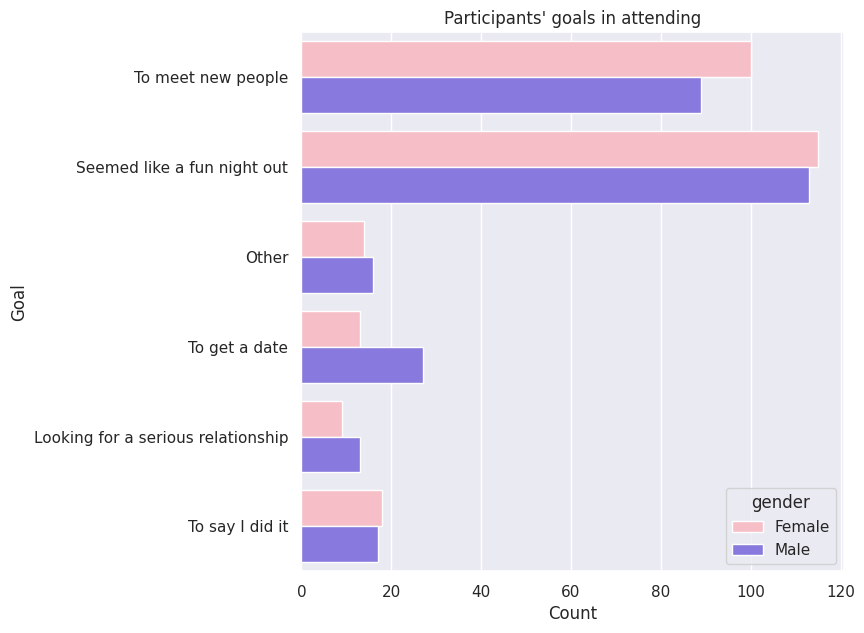

In [177]:
plt.figure(figsize = (7,7))
sns.countplot(y = "goal", data = df_part, hue = "gender", palette = palette).set(title = "Participants' goals in attending", xlabel = "Count", ylabel = "Goal")

plt.show()

Most participants' goals are social and fun, not particularly getting a date or a relationship, which might impact their decision in accepting a second date.

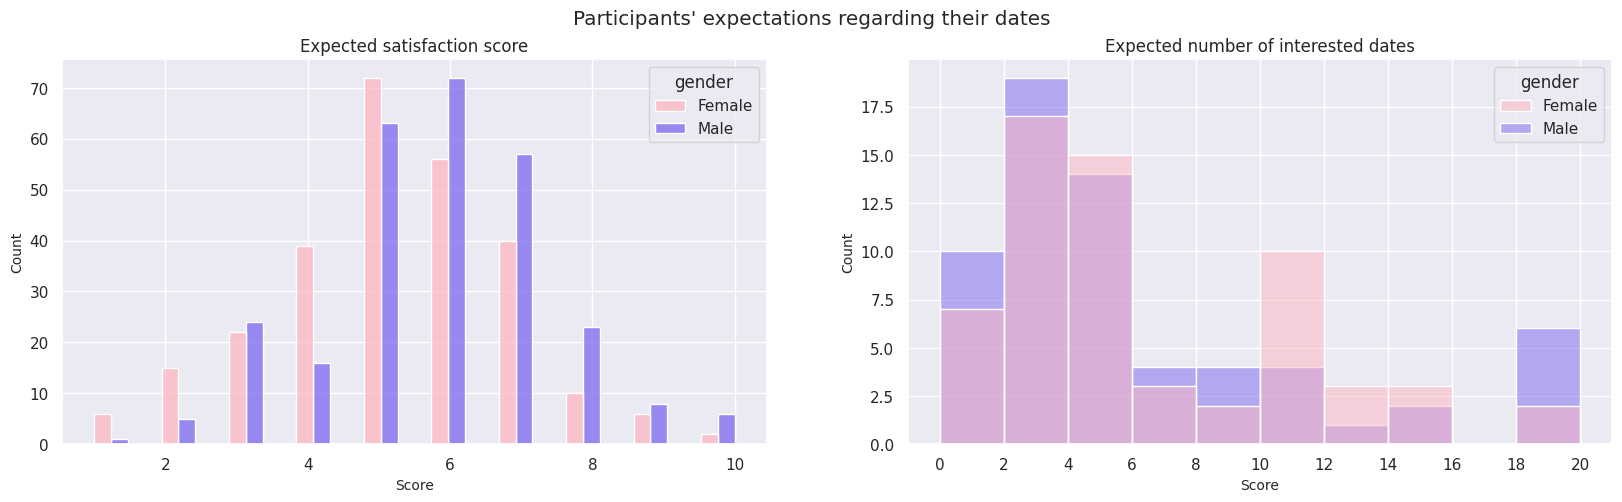

In [178]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle("Participants' expectations regarding their dates")

sns.histplot(ax = axes[0], data = df_part, x = df_part["exphappy"], hue = "gender", multiple = "dodge", palette = palette)
axes[0].set_xlabel("Score", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)
axes[0].set_title("Expected satisfaction score")

sns.histplot(ax = axes[1], data = df_part, x = df_part["expnum"], binwidth = 2, hue = "gender", multiple = "layer", palette = palette).set_xticks(range(0, 22, 2))
axes[1].set_xlabel("Score", fontsize=10)
axes[1].set_ylabel("Count", fontsize=10)
axes[1].set_title("Expected number of interested dates")

plt.show()

Participants' expectations as to how happy they would be with the people they would meet were mostly average, with women being more pessimistic and men having a tendancy towards more optimism.

For the number of interested dates, we must keep in mind that we had more than 78% missing values. It's safe to assume that participants are not confident in stating how many "yes" they will get. For the few who answer, it appears most participants are cautious and most assume less than 6 interested dates. Men seem to be more "extreme", either expecting almost no interested dates, or all of them, while women are more moderate in their self-confidence.



## 2.6. Attributes importance before the date

In [179]:
attr_list = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests']

df_attr_imp1_1 = df_part[['gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy(deep = True)
df_attr_imp1_1_by_gender = df_attr_imp1_1.groupby("gender").mean()

fig1_1 = go.Figure()

fig1_1.add_trace(go.Scatterpolar(
      r=df_attr_imp1_1_by_gender.iloc[0, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Women",
       marker=dict(
        color="lightpink"
    )
))

fig1_1.add_trace(go.Scatterpolar(
      r=df_attr_imp1_1_by_gender.iloc[1, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Men",
      marker=dict(
        color="mediumslateblue"
    )
))

fig1_1.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis = dict(direction = "clockwise")
    ),
    title = "Attributes importance stated before the experiment",
    showlegend=True,
    width = 600,
    height = 500
)

fig1_1.show()

Men state the most important attribute in a date is attractiveness, while ambition is the least desirable.

Women find intelligence to be the most desirable trait, while shared interests are the least important. The sought-out profile is still quite well-rounded, with all attributes having close scores.

Both genders give similar scores to sincerity, intelligence, fun and shared interests. But there is a notable disparity for the other 2 traits : men rate attractivity particularly highly, and notably give little value to ambition.

In [180]:
df_attr_imp2_1 = df_part[['gender', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].copy(deep = True)
df_attr_imp2_1_by_gender = df_attr_imp2_1.groupby("gender").mean()

fig2_1 = go.Figure()

fig2_1.add_trace(go.Scatterpolar(
      r=df_attr_imp2_1_by_gender.iloc[1, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Men",
      marker=dict(
        color="mediumslateblue"
    )
))

fig2_1.add_trace(go.Scatterpolar(
      r=df_attr_imp2_1_by_gender.iloc[0, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Women",
       marker=dict(
        color="lightpink"
    )
))

fig2_1.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis = dict(direction = "clockwise")
    ),
    title = "What participants think the opposite sex looks for in a date",
    showlegend=True,
    width = 600,
    height = 500
)

fig2_1.show()

Women have a notion close to reality when it comes to the importance of attractiveness, they also think men value fun and give ambition little worth, which is accurate. They tend to underestimate the importance of sincerity and intelligence.

Men's perception is also realistic, but they wildly overestimate the importance of attractiveness, and slightly overestimate ambition, while underestimating other traits.

In conclusion, both gender were able to predict accurately what the opposite sex are looking for in a partner, to a certain degree.

In [181]:
df_attr_imp3_1 = df_part[['gender', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].copy(deep = True)
df_attr_imp3_1_by_gender = df_attr_imp3_1.groupby("gender").mean()

fig3_1 = go.Figure()

fig3_1.add_trace(go.Scatterpolar(
      r=df_attr_imp3_1_by_gender.iloc[1, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Men",
      marker=dict(
        color="mediumslateblue"
    )
))

fig3_1.add_trace(go.Scatterpolar(
      r=df_attr_imp3_1_by_gender.iloc[0, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Women",
       marker=dict(
        color="lightpink"
    )
))

fig3_1.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis = dict(direction = "clockwise")
    ),
    title = "How participants rate their own attributes",
    showlegend=True,
    width = 600,
    height = 500
)

fig3_1.show()

Participants mostly describe themselves as well rounded and tend to be slighlty moe cautious when rating their own attractiveness.

There are no significant differences between how men and women rate themselves.

# 3. It's a match...?

What are the factors that are (positively or negatively) correlated with a positive decision to go on a second date?



## 3.1. Matches and positive responses

How many positive responses did participants get? 



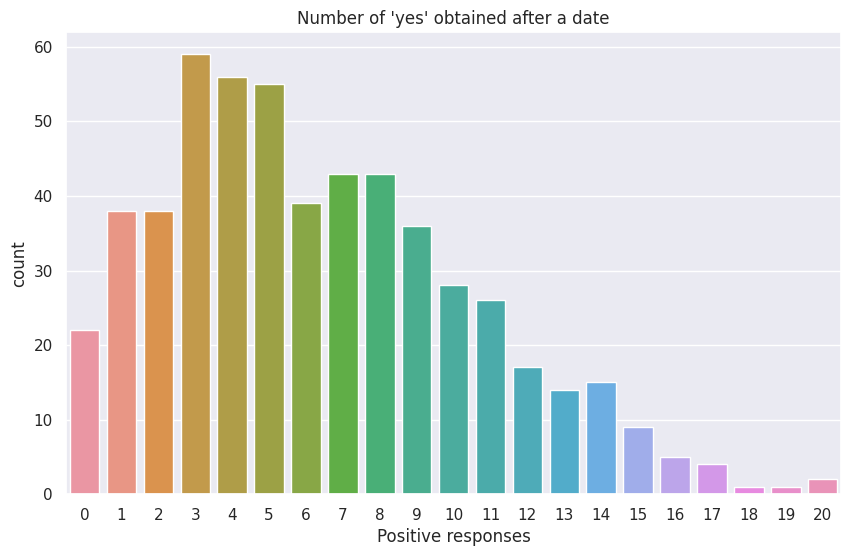

In [182]:
print("How many positive responses did participants get? \n")
df_yes = df[["iid", "dec_o"]].groupby("iid").sum("dec_o")

plt.figure(figsize = (10,6))
sns.countplot(data = df_yes, x = "dec_o").set(xlabel = "Positive responses")
plt.title("Number of 'yes' obtained after a date")
plt.show()

In [183]:
no_pos = df_yes['dec_o'].value_counts()[0]
pos_rate = round(len(df[df["dec_o"] == 1])*100/len(df), 2)
print(f"There were {no_pos} participants who got no positive response throughout the experiment! \n")
print(f"The rate of positive responses in dates is {pos_rate}%")

There were 22 participants who got no positive response throughout the experiment! 

The rate of positive responses in dates is 41.96%


How many matches did participants get? 



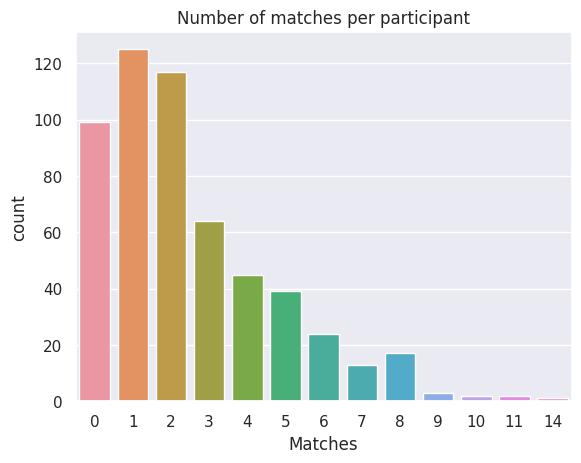

In [184]:
print("How many matches did participants get? \n")
df_match = df[["iid", "match"]].groupby("iid").sum("match")

sns.countplot(data = df_match, x = "match").set(xlabel = "Matches")
plt.title("Number of matches per participant")
plt.show()

In [185]:
no_match = df_match['match'].value_counts()[0]
# match_rate = round(len(df[df["match"] == 1])*100/len(df), 2)
match_rate = round(df["match"].mean()*100, 2)
print(f"{no_match} participants got 0 match throughout the experiment. That is {round(no_match*100/total, 2)}% of our dataset. \n")
print(f"The match rate is {match_rate}%")

99 participants got 0 match throughout the experiment. That is 17.97% of our dataset. 

The match rate is 16.47%


In [186]:
# df_dec = df[["iid", "dec", "gender"]].groupby("iid").agg({"dec" : "sum", "gender" : "first"})
# df_dec["gender"] = df_dec["gender"].map({1 : "Male", 0 : "Female"})
df_gender_dec = df[["gender", "dec"]].copy(deep = True)
df_gender_dec["gender"] = df_gender_dec["gender"].map({1 : "Male", 0 : "Female"})
df_gender_dec["dec"] = df_gender_dec["dec"].map({1 : "Yes", 0 : "No"})

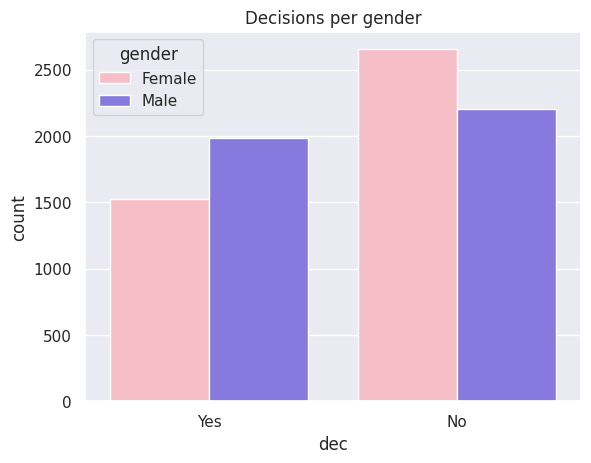

In [187]:
sns.countplot(data = df_gender_dec, x = "dec", hue = "gender", palette = palette)
plt.title("Decisions per gender")
plt.show()

Interestingly, females have a much stronger tendancy to say no to another date, whereas decisions are more balanced for males.

**Gender** is therefore the first parameter we can identify as as factor to getting a second date : it is easier as a female to get a "yes" from the opposite sex, than it is for a male.

## 3.2. Age

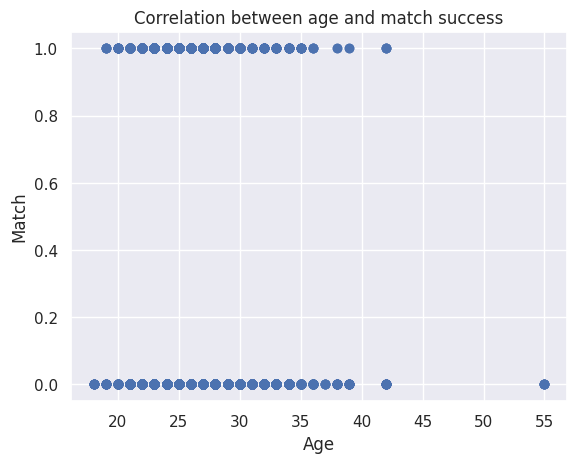

In [188]:
plt.scatter(df["age"], df["match"])
plt.title("Correlation between age and match success")
plt.xlabel("Age")
plt.ylabel("Match")
plt.show()

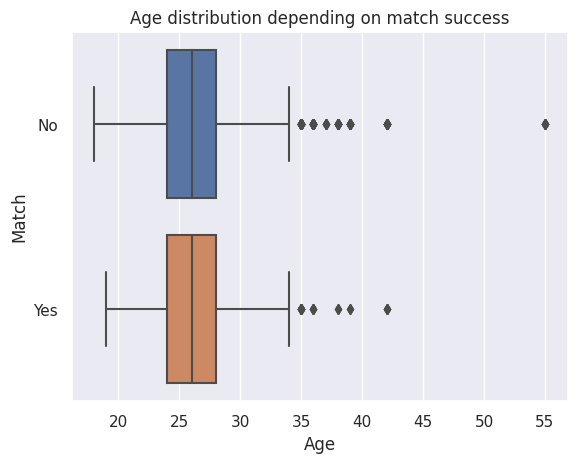

In [189]:
df_age = df[["match", "age"]].dropna()
df_age["match"] = df_age["match"].map({1 : "Yes", 0 : "No"})

sns.boxplot(data = df_age, x = "age", y = "match")
plt.title("Age distribution depending on match success")
plt.xlabel("Age")
plt.ylabel("Match")

plt.show()

There doesn't seem to be any correlation between age and getting a match.

The age distribution is practically the same between the 2 groups.

## 3.3. Race

In [190]:
df_race = df[["samerace", "match"]].copy(deep = True)
df_race["samerace"] = df_race["samerace"].map({1 : "Yes", 0 : "No"})
df_race["match"] = df_race["match"].map({1 : "Yes", 0 : "No"})

In [191]:
df_race.groupby("match")["samerace"].value_counts()

match  samerace
No     No          4248
       Yes         2750
Yes    No           814
       Yes          566
Name: samerace, dtype: int64

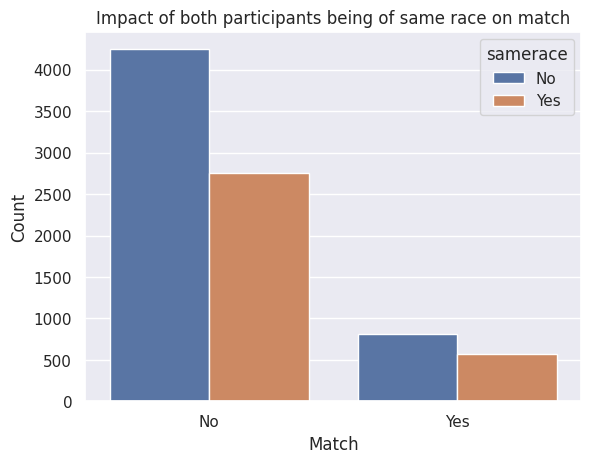

In [192]:
sns.countplot(data = df_race, x = "match", hue = "samerace")
plt.title("Impact of both participants being of same race on match")
plt.xlabel("Match")
plt.ylabel("Count")
plt.show()

In [193]:
df_samerace = df_race[df_race["samerace"] == "Yes"]
df_not_samerace = df_race[df_race["samerace"] == "No"]

In [194]:
match_rate_samerace = round(df_samerace["match"].value_counts()["Yes"]*100/len(df_samerace), 2)
match_rate_not_samerace = round(df_not_samerace["match"].value_counts()["Yes"]*100/len(df_not_samerace), 2)
print(f"The match rate for partners of the same race was {match_rate_samerace}%, and for those of different races was {match_rate_not_samerace}% — this is only a 1% difference. \n")
print(f"Moreover, both are extremely close to our general match rate (without consideration of race), which is {match_rate}%")

The match rate for partners of the same race was 17.07%, and for those of different races was 16.08% — this is only a 1% difference. 

Moreover, both are extremely close to our general match rate (without consideration of race), which is 16.47%


In [195]:
from scipy.stats import chi2_contingency

test = chi2_contingency(pd.crosstab(df["samerace"], df["match"]))
if test.pvalue > 0.05 :
  print("The hypothesis of independance is not rejected.")
else :
  print("we can reject the null hypothesis in favor of the alternative hypothesis: “Partners being of the same race has an incidence over the match probability”.")

The hypothesis of independance is not rejected.


Most participants stated that race was not a determining in factor in a date, and these results suggest the same : being of the same race as your date partner does not favor getting a positive response compared to someone of a different race.

## 3.4. Goals and expectations

In [196]:
df_goals = df[["goal", "dec", "match"]].copy(deep = True)
df_goals["goal"] = df_goals["goal"].map(goals_dict)
# df_goals = df_goals.groupby(["goal", "match"]).agg({"match": "count"})

In [197]:
df_goals_rates = df_goals.groupby("goal").mean()

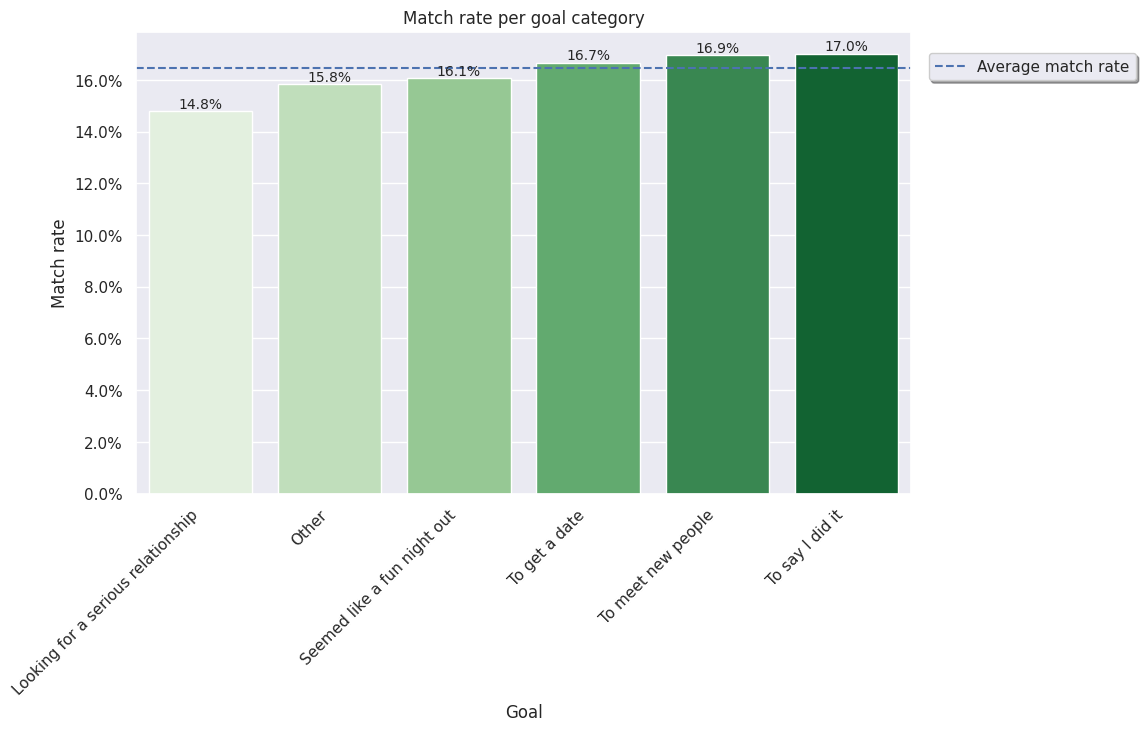

In [198]:
plt.figure(figsize = (10,6))
ax = sns.barplot(data = df_goals_rates, x = df_goals_rates.index, y = df_goals_rates["match"].sort_values()*100, palette = "Greens")
ax.bar_label(ax.containers[0], fontsize=10, fmt = '{:.1f}%')
plt.axhline(y = match_rate, linestyle = "dashed", label = "Average match rate")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.97),
          fancybox=True, shadow=True, ncol=5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45, ha='right')
plt.title("Match rate per goal category")
plt.xlabel("Goal")
plt.ylabel("Match rate")

plt.show()

We observe that coming into the experiment hoping for a date or a relationship does not help in getting a match. Actually, participants looking for a serious relationship go the lowest score. It might be that their expectations don't match those of most other participants or that they are too pushy and put off their date partners.

In [199]:
df_diff = df[["iid", "round", "match", "expnum"]].copy(deep = True).dropna()
df_diff["exprate"] = df_diff["expnum"]/df_diff["round"]
df_diff = df_diff.groupby("iid").mean()

In [200]:
diff = df_diff["match"]-df_diff["exprate"]
fig_match_diff = px.scatter(df_diff,
                 y=diff,
                 color = diff,
                 color_continuous_scale="viridis",
                 template='plotly_white',
                 title="Difference between actual match rate and expected match rate"
                )
fig_match_diff.add_hline(y=diff.mean(),
                         line_dash="dash",
                         line_color="green",
                         annotation_text=f"Average rate difference = {diff.mean():.2f}",
                         annotation_position="bottom right")

fig_match_diff.show()

We can see most participants got less matches than they anticipated. The average difference

Although we have to keep in dite that the expected number of matches column had more than 78% missing values, so this is only meaningful for a fraction of our attendees.

## 3.5. Date order

In [201]:
df_time = df[["round", "order", "match"]].copy(deep = True)

df_time["new_order"] = np.where(df_time["order"] == df_time["round"], "Last date", df_time["order"])

df_time["new_order"] = df_time["new_order"].apply(lambda x : "First date" if x == "1"
                                                  else "Last date" if x == "Last date"
                                                  else "Met in the middle")

In [202]:
df_time_rates = df_time.groupby("new_order").mean(["match"])

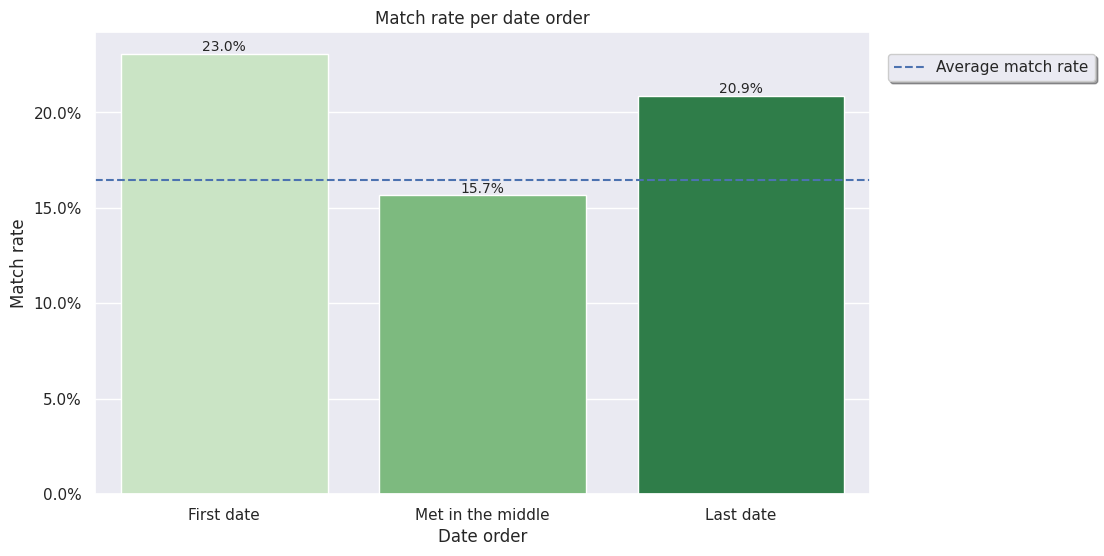

In [203]:
plt.figure(figsize = (10,6))
ax = sns.barplot(data = df_time_rates, x = df_time_rates.index, y = df_time_rates["match"]*100, order = ["First date", "Met in the middle", "Last date"], palette = "Greens")
ax.bar_label(ax.containers[0], fontsize=10, fmt = '{:.1f}%')
plt.axhline(y = match_rate, linestyle = "dashed", label = "Average match rate")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.97),
          fancybox=True, shadow=True, ncol=5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Match rate per date order")
plt.xlabel("Date order")
plt.ylabel("Match rate")

plt.show()

It is most effective to be someone's first or last date.

This actually demonstrates a psychological phenomenon: primacy and recency effect! People tend to remember the first (primacy) and last (recency) encounter.

Being someone's first date yields the best results, probably because it makes you more memorable and the person's outlook on the experiment is still fresh, whereas they tend to tire and mix up their dates as the experiment progresses.

Being the last date also helps getting a match (although being first is slightly better), probably because people feel a sense of urgency and are afraid to lose an opportunity as the experiment ends.

Therefore, **date order** also appears to be a determining factor in getting a second date.

## 3.6. Attributes

In [204]:
df_date = df[['iid', 'race', 'gender', 'dec', 'match', 'int_corr', 'samerace',
             'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].copy(deep = True)

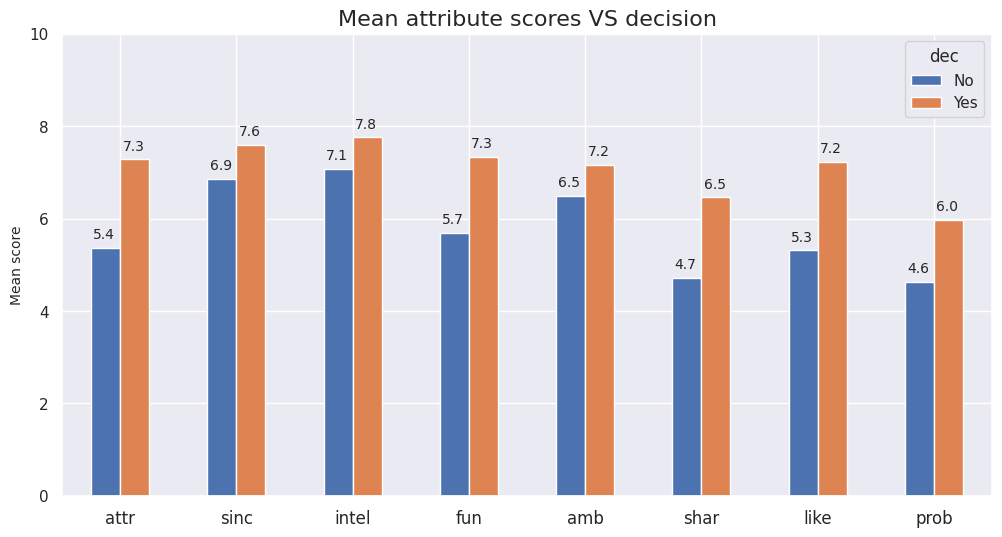

In [205]:
fig_ratings = df_date[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].groupby('dec').mean().stack().unstack(0)
fig_ratings = fig_ratings.rename(columns={0: 'No', 1: 'Yes'})
ax = fig_ratings.plot(kind='bar', figsize=(12,6), ylim=(0,10))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Mean attribute scores VS decision', fontsize = 16)
ax.set_ylabel('Mean score', fontsize=10)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

As expected, **higher attributes rates** lead to more positive decisions.

The bigger gaps are observed in **Attractive** ratings, and **Liking**; **Fun** also appears to make a substantial difference in the decision.

On the other hand, the rating gaps for Sincerity, Intelligence and Ambition are much smaller, these attributes seem less influencial in the final decision.

In [206]:
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# cat_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# for ax, cat, attr in zip(axs.flatten(), cat_list, attr_list):
#   sns.boxplot(ax = ax, data = df, x = 'dec', y = cat)
#   ax.set_title(f'{attr} vs. decison')

# plt.tight_layout()
# plt.show()

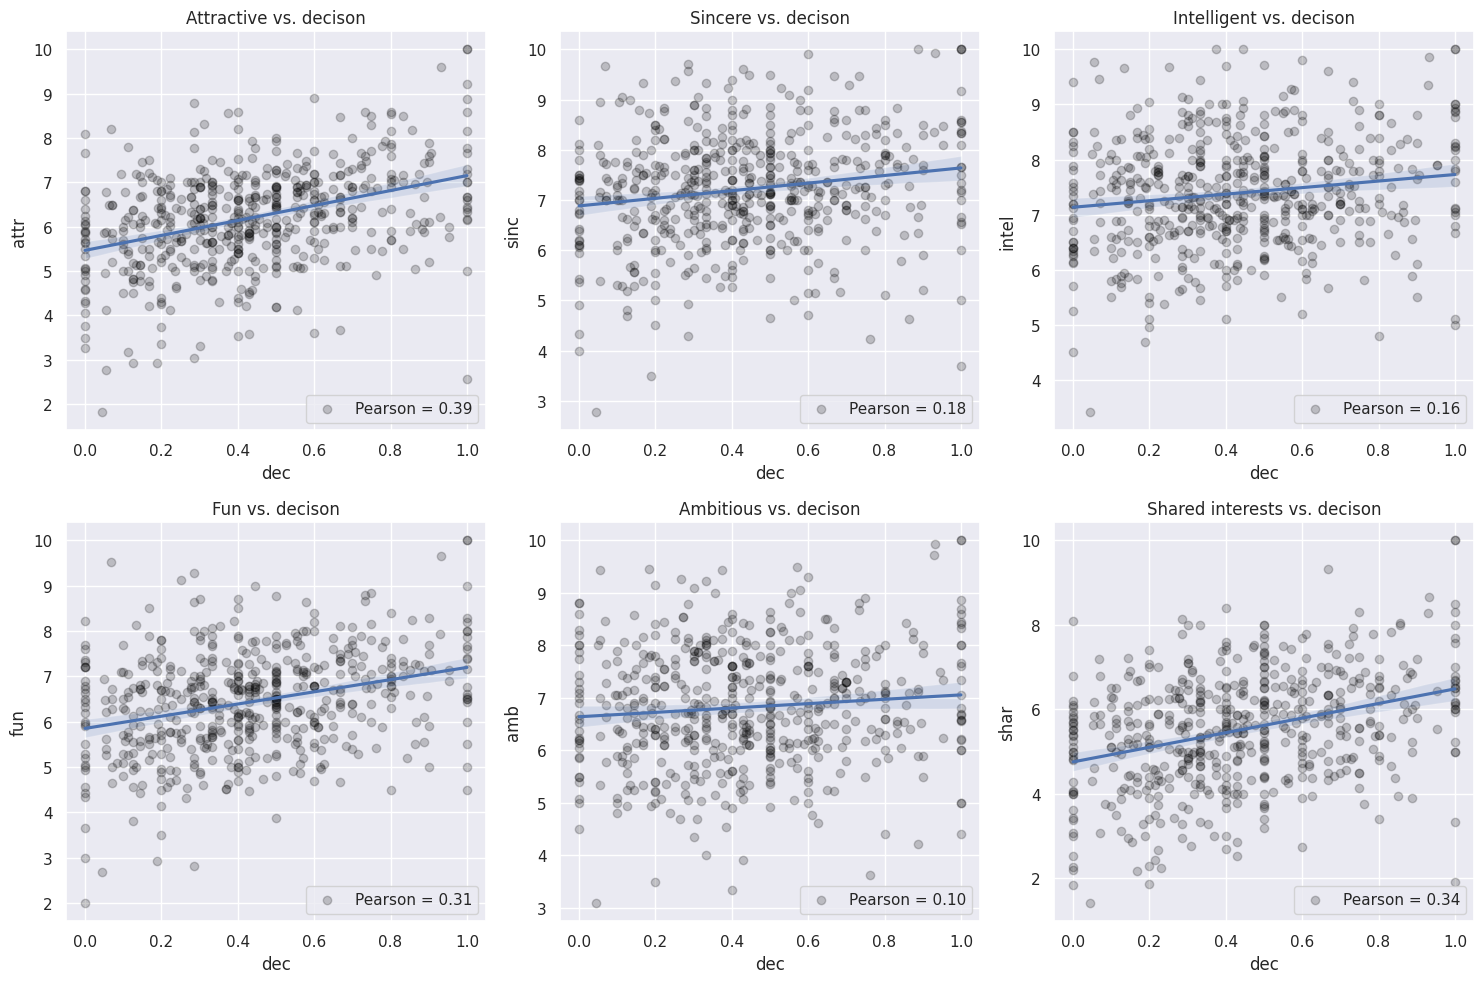

In [207]:
from scipy.stats import pearsonr

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

cat_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

for ax, cat, attr in zip(axs.flatten(), cat_list, attr_list):
  df_tmp = df[["iid", "dec", cat]].dropna().groupby("iid").mean()
  sns.regplot(ax = ax, data = df_tmp, x = "dec", y = cat, scatter_kws = {"color": "black", "alpha": 0.2})
  r, p = pearsonr(x = df_tmp["dec"], y = df_tmp[cat])
  ax.collections[0].set_label(f'Pearson = {r:.2f}')
  ax.legend(loc = "lower right")
  ax.set_title(f'{attr} vs. decison')

plt.tight_layout()
plt.show()

The attributes most correlated to a positive decision are


1.   Attractiveness

2.   Shared Interests
3.   Fun

The other attributes appear to be way less relevant in the final decision taken by the participant.



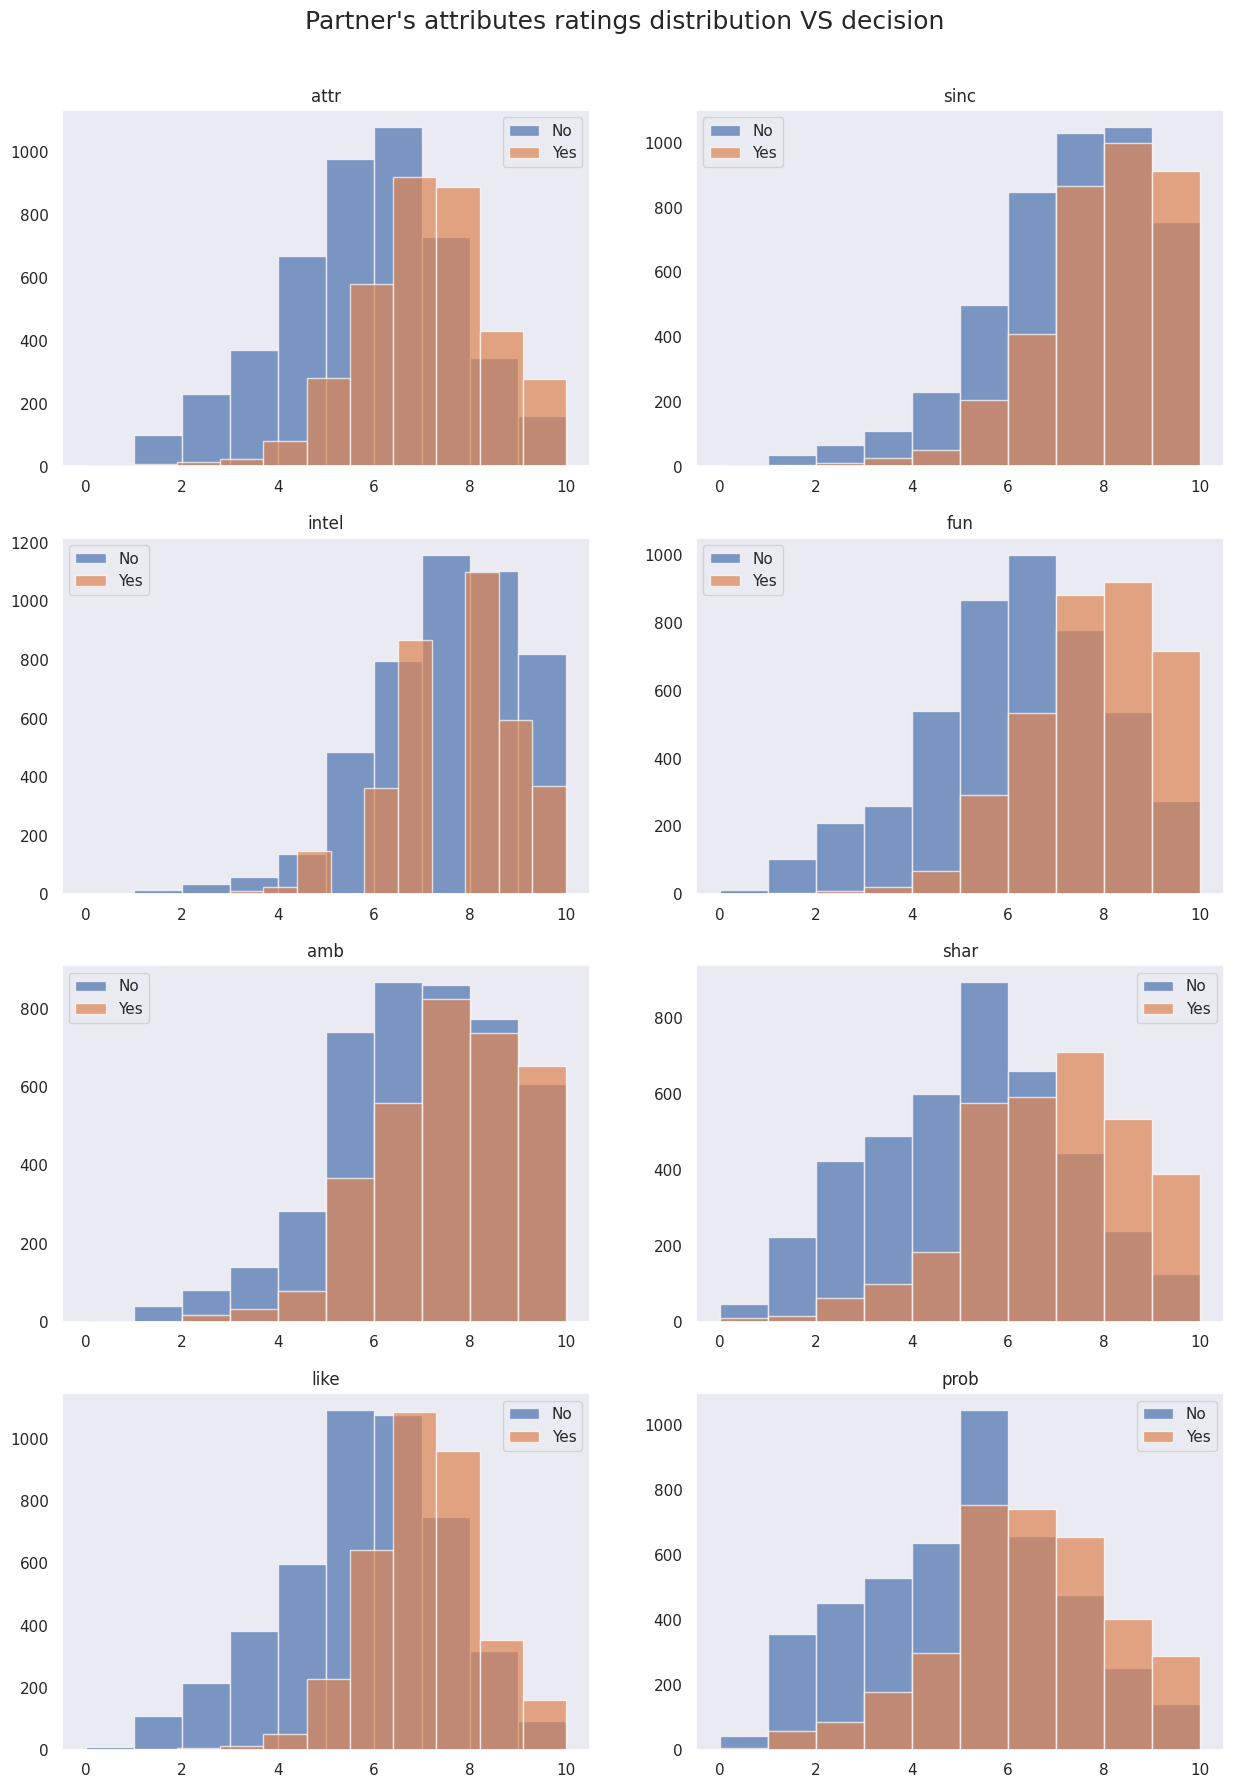

In [208]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df_date[df_date.dec==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    df_date[df_date.dec==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j

plt.subplots_adjust(top=0.93)
fig.suptitle("Partner's attributes ratings distribution VS decision", fontsize=18)
plt.show()

While these plots confirm that higher rates lead to more positive decisions overall, it is still possible to get a "yes" with a very low rating in some categories.

In [209]:
# corr_no = df[df.dec==0][feats].corr()
# corr_yes = df[df.dec==1][feats].corr()

# fig, ax = plt.subplots(1,2, figsize=(18, 7))
# sns.heatmap(corr_no, annot=True, cmap="coolwarm", ax=ax[0])
# sns.heatmap(corr_yes, annot=True, cmap="coolwarm", ax=ax[1])

# ax[0].set_title('No', fontsize=15)
# ax[1].set_title('Yes', fontsize=15)

# plt.show()

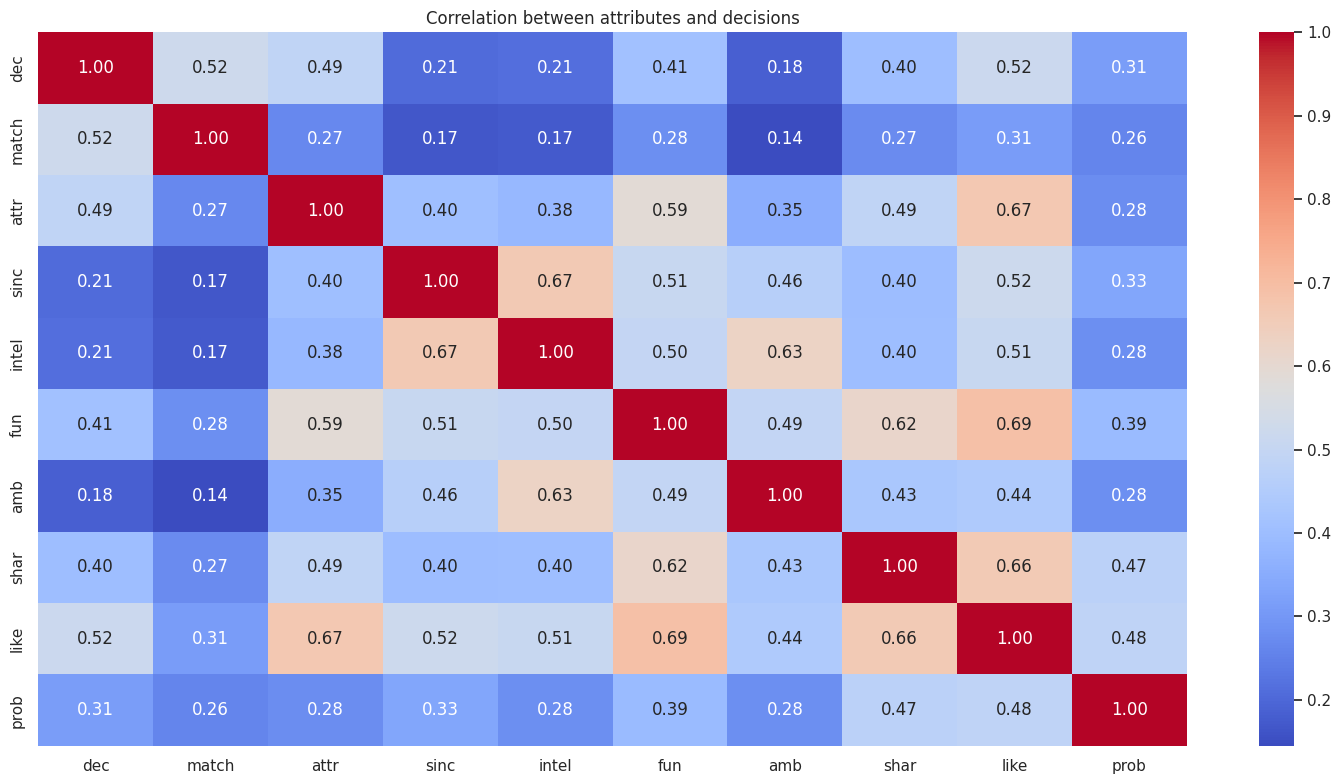

In [210]:
correlation = df[['dec', 'match', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].dropna().corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation between attributes and decisions")
plt.tight_layout()
plt.show()

Our takeaway from this is :


*   Participants tend to correlate how they rate their partner's Intelligence with their Sincerity and Ambition scores
*   How much they like their date partner is most strongly correlated with Fun, Attractivity and Shared Interests

*   Attributes that have the most impact over the decision are Liking and Attractivity
*   Interestingly, giving a high rating to Attractivity, Ambition or Intelligence reduces the participant's expectations in getting a positive review. They might feel the person is out of their league.




# 4. Participants perception and its evolution over time (and dates)

## 4. 1. Participants self-ratings VS how they are rated

In [294]:
self_ratings_1 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
partner_ratings = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
perc_diff = ['iid'] + self_ratings_1 + partner_ratings
df_perc_diff = df[perc_diff].copy(deep = True).dropna().groupby('iid').mean()

In [227]:
diff_list = ["attr_diff", "sinc_diff", "intel_diff", "fun_diff", "amb_diff"]
for i, cat in zip(range(5), diff_list):
  df_perc_diff[cat] = df_perc_diff.apply(lambda x : x[partner_ratings[i]] - x[self_ratings_1[i]], axis = 1)

In [228]:
df_perc_diff.head()

,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr_o,sinc_o,intel_o,fun_o,amb_o,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff
iid,,,,,,,,,,,,,,,
1,6.0,8.0,8.0,8.0,7.0,6.700000,7.400000,8.000000,7.200000,8.000000,0.700000,-0.600000,0.000000,-0.800000,1.000000
2,7.0,5.0,8.0,10.0,3.0,7.700000,7.100000,7.900000,7.500000,7.500000,0.700000,2.100000,-0.100000,-2.500000,4.500000
3,8.0,9.0,9.0,8.0,8.0,6.555556,6.777778,7.222222,6.222222,7.111111,-1.444444,-2.222222,-1.777778,-1.777778,-0.888889
4,7.0,8.0,7.0,9.0,8.0,7.000000,7.100000,7.700000,7.500000,7.700000,0.000000,-0.900000,0.700000,-1.500000,-0.300000
5,6.0,3.0,10.0,6.0,8.0,5.300000,7.700000,7.600000,7.200000,7.800000,-0.700000,4.700000,-2.400000,1.200000,-0.200000


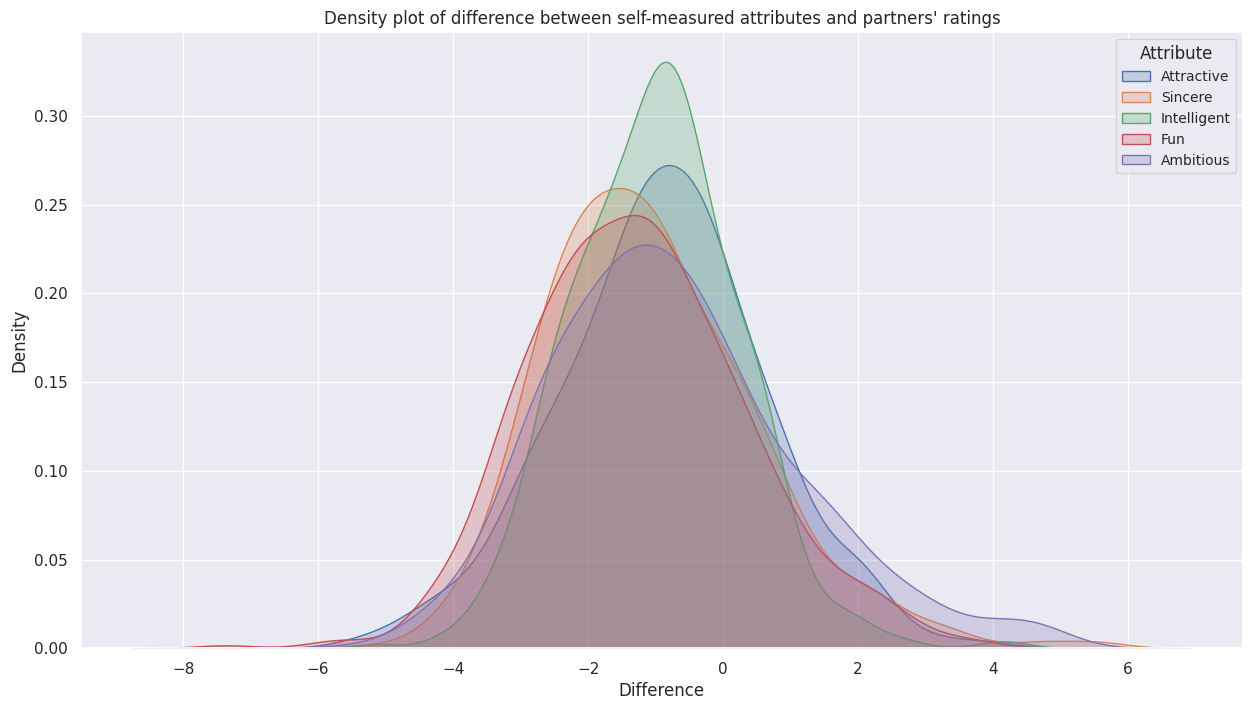

In [229]:
plt.figure(figsize = (15,8))
for diff, attr in zip(diff_list, attr_list):
    sns.kdeplot(df_perc_diff[diff],
                 fill = True,
                 label = attr)

plt.legend(prop={'size': 10}, title = 'Attribute')
plt.title("Density plot of difference between self-measured attributes and partners' ratings")
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

It seems the density plots for all attributes are slightly skewed to the left.

Most participants have a pretty good evaluation of their own value (since density'shighest value is close to 0), but they tend to overestimate their attributes compared to how they are actually rated during dates. Sincerity is the most inflated attribute, with a density peak at almost 2 points difference between self-evaluation and date rating, followed by fun and ambition.

Very few participants underestimate their value, and when they do, the difference tends to be much smaller than for those who oversetimate.

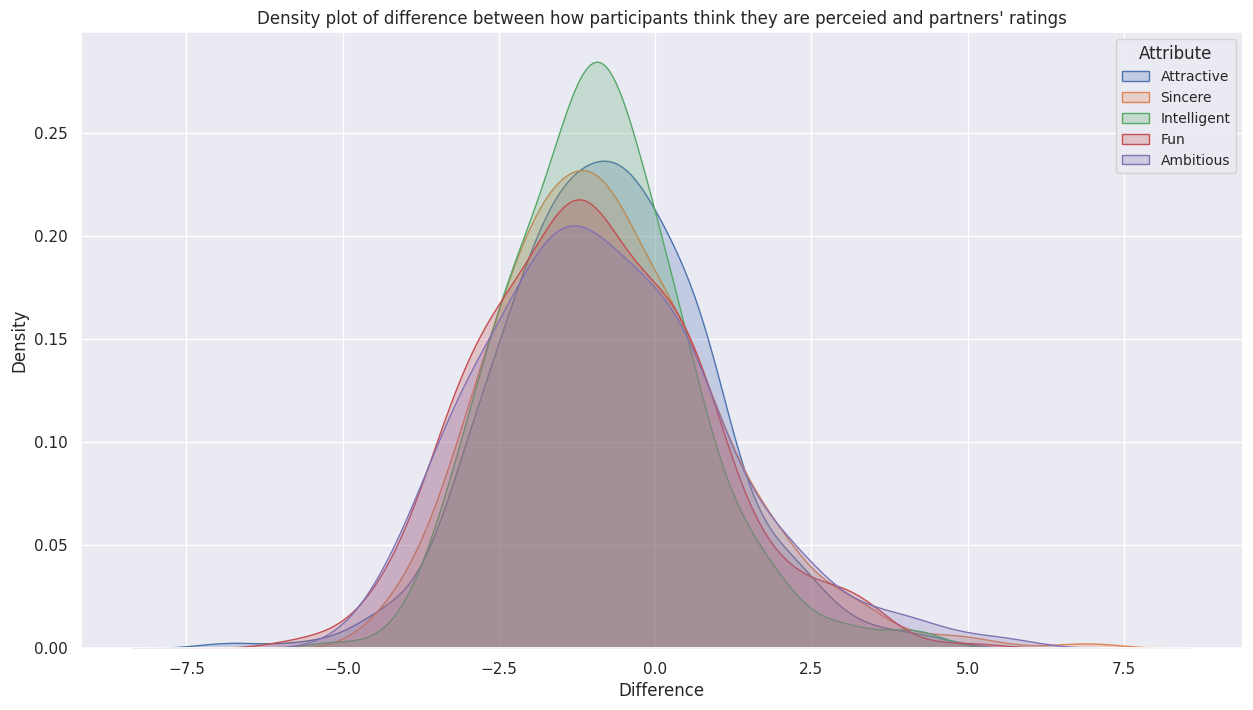

In [301]:
self_ratings_2 = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']
partner_ratings = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
perc_diff_2 = ['iid'] + self_ratings_2 + partner_ratings
df_perc_diff_2 = df[perc_diff_2].copy(deep = True).dropna().groupby('iid').mean()
diff_list = ["attr_diff", "sinc_diff", "intel_diff", "fun_diff", "amb_diff"]

for i, cat in zip(range(5), diff_list):
  df_perc_diff_2[cat] = df_perc_diff_2.apply(lambda x : x[partner_ratings[i]] - x[self_ratings_2[i]], axis = 1)

plt.figure(figsize = (15,8))
for diff, attr in zip(diff_list, attr_list):
    sns.kdeplot(df_perc_diff_2[diff],
                 fill = True,
                 label = attr)

plt.legend(prop={'size': 10}, title = 'Attribute')
plt.title("Density plot of difference between how participants think they are perceied and partners' ratings")
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

Here the ditribution is still slightly skewed to the left, a bit less so than in the previous plot. Participants can closely predict how they will be perceived but again, tend to overestimate their score a little in every category,

In [266]:
df_successful = df[["iid", "match"]].copy(deep = True).groupby("iid").sum("match")
df_successful.describe()

,match
count,551.000000
mean,2.504537
std,2.287412
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,14.000000


In [267]:
# We'll set our threshold at 4 (the third quartile) to determine successful participants
df_successful = df_successful[df_successful["match"] >= 4]

In [271]:
df_successful_attr = df[['iid'] + self_ratings_1].copy(deep = True)
df_successful_attr = df_successful_attr.filter(items = df_successful.index.to_list(), axis = 0).groupby('iid').mean()
df_self_ratings = df[self_ratings_1].copy(deep = True)

[6.605263157894737,
 7.315789473684211,
 8.18421052631579,
 7.7631578947368425,
 7.078947368421052]

In [282]:
self_attr_list = attr_list[:-1]

In [293]:
self_attr_list = attr_list[:-1]

fig_successful = go.Figure()

fig_successful.add_trace(go.Scatterpolar(
      r=df_self_ratings.mean().to_list(),
      theta=self_attr_list,
      fill="toself",
      name="Average self-ratings",
      marker=dict(
        color="lightsteelblue"
    )
))

fig_successful.add_trace(go.Scatterpolar(
      r=df_successful_attr.mean().to_list(),
      theta=self_attr_list,
      fill="toself",
      name="Self-ratings of participants with >= 4 matches",
       marker=dict(
        color="mediumseagreen"
    )
))

fig_successful.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis = dict(direction = "clockwise")
    ),
    title = "Self-ratings of successful participants VS averages",
    showlegend=True,
    legend=dict(x=1.5, y=0.5),
    width = 800,
    height = 500
)

fig_successful.show()

It turns out very successful participants (4 matches or more) don't rate themselves particularly highly, they actually score themselves a little lower on every attribute compared to the average scores.

It would seem people are not able to accurately predict their value on the dating market, as they are unable to evaluate properly the number of matches they can expect or the ratings their partners will give them.

## 4. 2. Preferred attributes change as the experiment advances

In [341]:
df_attr_imp1_2 = df_part[['gender', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']].copy(deep = True)
df_attr_imp1_2_by_gender = df_attr_imp1_2.groupby("gender").mean()

In [351]:
from plotly.subplots import make_subplots

fig_attr_evol = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Before experiment", "After experiment"),
    specs=[[{"type": "polar"} for _ in range(2)] for _ in range(1)],
)

fig_attr_evol.add_trace(
    go.Scatterpolar(
      r=df_attr_imp1_1_by_gender.iloc[0, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Women",
       marker=dict(
        color="lightpink")
       ),
    row=1,
    col=1,
)

fig_attr_evol.add_trace(
    go.Scatterpolar(
      r=df_attr_imp1_1_by_gender.iloc[1, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Men",
      marker=dict(
        color="mediumslateblue"
    )),
    row=1,
    col=1,
)

fig_attr_evol.add_trace(
    go.Scatterpolar(
      r=df_attr_imp1_2_by_gender.iloc[0, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Women",
       marker=dict(
        color="lightpink"
    )),
    row=1,
    col=2,
)

fig_attr_evol.add_trace(
    go.Scatterpolar(
      r=df_attr_imp1_2_by_gender.iloc[1, :].to_list(),
      theta=attr_list,
      fill="toself",
      name="Men",
      marker=dict(
        color="mediumslateblue"
    )),
    row=1,
    col=2,
)

fig_attr_evol.update_polars(
        radialaxis=dict(range = [0,31], visible=False),
        angularaxis = dict(direction = "clockwise")
    )

fig_attr_evol.update_layout(
    title = "Evolution of attributes importance over time",
    showlegend=True,
    width = 1500,
    height = 500
)

fig_attr_evol.update_annotations(yshift=20)

fig_attr_evol.show()

Attributes' importance clearly shifts over time in favor of attractiveness, for both genders. Sincerity is the attributes that loses the most importance, with other qualities' value either slightly decreasing or remaining the same.

It shows that what participants declare ahead of time should not alaways be trusted and that their perspective tends to be biaised, or that their answers are not always matching their actions and decisions.

# Conclusion

We have explored the dataset extensively and visualized our participants' characteristics (demographics, socio-economic background, dating habits and preferences).

When analysing the results of he experiment, it appears the following factors are the most correlated to getting a match :    


*   Gender

*   Date order
*   Attractivity

*   Fun


*   Shared interests

We've also realized that participants cannot necessarily accurately predict their value on the dating market, nor can they properly assess which attributes are the most crucial to them in a date, and will lead to a positive feedback.

In order to progress further, it would be interesting to use a supervised machine learning algorithm to establish feature importance, and to elaborate a model able to accurately predict the probability of 2 individuals being interested in going on a date together.




In [352]:
# Last but not least : let's create our requirements.txt file for this notebook :
!pip3 freeze > requirements.txt